Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


from sklearn.metrics import accuracy_score, log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import average_precision_score,recall_score
from sklearn.linear_model import LogisticRegression

importing dataset

In [2]:
df= pd.read_csv("/content/Train_data.csv")
test_df= pd.read_csv("/content/Test_data.csv")

In [3]:
df.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
0,4,10,4,12,4,11,4,5,4,4,5
1,1,7,3,6,4,1,2,2,1,12,0
2,4,8,1,8,3,1,1,1,2,11,2
3,1,6,2,4,3,4,2,5,2,6,2
4,3,11,2,11,1,12,3,4,2,12,2


In [4]:
test_df.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,2,2,3,12,3,8,1,12,3,9
1,1,9,4,5,2,6,4,11,4,8
2,1,1,4,12,1,12,3,3,3,1
3,4,3,4,6,2,6,4,8,1,9
4,4,9,4,10,4,8,4,2,4,5


In [5]:
df.shape

(167408, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167408 entries, 0 to 167407
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   S1      167408 non-null  int64
 1   C1      167408 non-null  int64
 2   S2      167408 non-null  int64
 3   C2      167408 non-null  int64
 4   S3      167408 non-null  int64
 5   C3      167408 non-null  int64
 6   S4      167408 non-null  int64
 7   C4      167408 non-null  int64
 8   S5      167408 non-null  int64
 9   C5      167408 non-null  int64
 10  Class   167408 non-null  int64
dtypes: int64(11)
memory usage: 14.0 MB


In [7]:
df.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
count,167408.000000,167408.000000,167408.000000,167408.000000,167408.000000,167408.000000,167408.000000,167408.000000,167408.000000,167408.000000,167408.000000
mean,2.503112,6.994857,2.501511,6.997903,2.501637,7.025542,2.501762,7.012903,2.496344,6.985568,1.206669
std,1.118754,3.736653,1.118731,3.739248,1.118437,3.735214,1.116116,3.737146,1.118416,3.733063,1.189444
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,3.000000,7.000000,2.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,2.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


Plotting the class Labels distribution

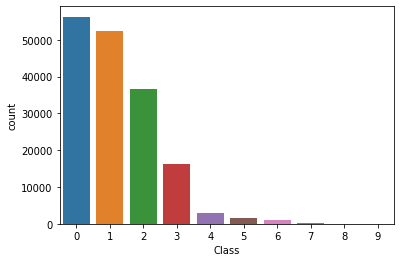

In [8]:
sns.countplot(df.Class)

Splitting into Train/test dataset

In [45]:
Xtrain = df.iloc[:,:-1]
ytrain = df.iloc[:,-1]
Xtest = test_df.iloc[:,:]

Scalling the dataset

In [46]:
from sklearn.preprocessing import StandardScaler
StdScale = StandardScaler().fit(Xtrain)
Xtrain = StdScale.transform(Xtrain)
Xtest = StdScale.transform(Xtest)


Checking the performance on multiple classification models

In [ ]:
classifiers = [
    LogisticRegression(random_state=0),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    ]

In [ ]:
# Logging for Visual Comparison
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

log_cols=["Classifier","accuracy"]
log = pd.DataFrame(columns=log_cols)
from sklearn.metrics import confusion_matrix

best_acc = 0
for clf in classifiers:
    clf.fit(Xtrain, ytrain)
    name = clf.__class__.__name__
    train_predictions = clf.predict(Xtest)
    acc = accuracy_score(ytest, train_predictions)
    if(acc>best_acc):
      best_acc=acc
      best_clf = clf

    log_entry = pd.DataFrame([[name, acc]], columns=log_cols)
    log = log.append(log_entry)
    print(name)

seeing the result of classification of models

In [16]:
log

,Classifier,accuracy
0,LogisticRegression,0.336029
0,DecisionTreeClassifier,1.000000
0,RandomForestClassifier,1.000000
0,AdaBoostClassifier,0.251201
0,GradientBoostingClassifier,0.452643
0,GaussianNB,0.336220
0,LinearDiscriminantAnalysis,0.336017


As, RandomForestClassifier gives the good result, we will use for prediction

In [41]:
from sklearn.multiclass import OneVsRestClassifier

In [42]:
ovr = OneVsRestClassifier(rfc).fit(Xtrain,ytrain)
ovr.score(Xtrain,ytrain)

1.0

Prediction of dataset

In [47]:
predictions = ovr.predict(Xtest)

Saving The result of prediction

In [51]:
res = pd.DataFrame({"prediction":predictions},index=test_df.index)

from google.colab import files
res.to_csv('submission.csv')         
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>